In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
data_splicing=pd.read_csv('./Thesis/diff_output_mr=30.tab', delimiter="\t")
df = pd.DataFrame(data_splicing)
df

,GENE,EVENT,SRR8758292_1,SRR8758295_1,E[dPsi],MV[dPsi]_at_0.95
0,DPM1,HsaEX6078702,0.995794,0.994164,0.001630,0.00
1,CFH,HsaEX6035727,0.999275,0.991556,0.007719,0.00
2,FUCA2,HsaEX0026577,0.014783,0.010569,0.004214,0.00
3,GCLC,HsaEX1015356,0.993390,0.980862,0.012528,0.00
4,GCLC,HsaEX0027220,0.986760,0.979433,0.007327,0.00
...,...,...,...,...,...,...
117819,EIF1AY,HsaINT0054785,0.014744,0.020451,-0.005707,0.00
117820,EIF1AY,HsaINT0054786,0.007762,0.013387,-0.005625,0.00
117821,EIF1AY,HsaINT0054787,0.005929,0.016795,-0.010866,0.00
117822,DDX3Y,HsaINT0046205,0.011561,0.018358,-0.006797,0.01


In [6]:
#function to identify the events with the required threshold to be considered significante AS events
result = []
for i in range(len(df)):
    Psi =df.iloc[i,4]
    MV = df.iloc[i,5]
    if Psi >0.1 and MV >0.1:
        result.append('True')
    elif Psi <-0.1 and MV >0.1:
        result.append('True')
    else:
        result.append('False')
df['Result']=result
df

,GENE,EVENT,SRR8758292_1,SRR8758295_1,E[dPsi],MV[dPsi]_at_0.95,Result
0,DPM1,HsaEX6078702,0.995794,0.994164,0.001630,0.00,False
1,CFH,HsaEX6035727,0.999275,0.991556,0.007719,0.00,False
2,FUCA2,HsaEX0026577,0.014783,0.010569,0.004214,0.00,False
3,GCLC,HsaEX1015356,0.993390,0.980862,0.012528,0.00,False
4,GCLC,HsaEX0027220,0.986760,0.979433,0.007327,0.00,False
...,...,...,...,...,...,...,...
117819,EIF1AY,HsaINT0054785,0.014744,0.020451,-0.005707,0.00,False
117820,EIF1AY,HsaINT0054786,0.007762,0.013387,-0.005625,0.00,False
117821,EIF1AY,HsaINT0054787,0.005929,0.016795,-0.010866,0.00,False
117822,DDX3Y,HsaINT0046205,0.011561,0.018358,-0.006797,0.01,False


In [7]:
df2 = len(df[df["Result"]=="True"])
print (df2)

106


In [8]:
# Function to obtain the type of event occurring in a column, through the identification provided in the 'EVENT' column
Type = []
for event in df['EVENT']:
    if 'EX' in event:
        Type.append('Exon Skip')    
    elif 'ALTA' in event:
        Type.append('ALTA')
    elif 'ALTD' in event:
        Type.append('ALTD')
    else:
        Type.append('Intron retention')       
df['Type']=Type
df

,GENE,EVENT,SRR8758292_1,SRR8758295_1,E[dPsi],MV[dPsi]_at_0.95,Result,Type
0,DPM1,HsaEX6078702,0.995794,0.994164,0.001630,0.00,False,Exon Skip
1,CFH,HsaEX6035727,0.999275,0.991556,0.007719,0.00,False,Exon Skip
2,FUCA2,HsaEX0026577,0.014783,0.010569,0.004214,0.00,False,Exon Skip
3,GCLC,HsaEX1015356,0.993390,0.980862,0.012528,0.00,False,Exon Skip
4,GCLC,HsaEX0027220,0.986760,0.979433,0.007327,0.00,False,Exon Skip
...,...,...,...,...,...,...,...,...
117819,EIF1AY,HsaINT0054785,0.014744,0.020451,-0.005707,0.00,False,Intron retention
117820,EIF1AY,HsaINT0054786,0.007762,0.013387,-0.005625,0.00,False,Intron retention
117821,EIF1AY,HsaINT0054787,0.005929,0.016795,-0.010866,0.00,False,Intron retention
117822,DDX3Y,HsaINT0046205,0.011561,0.018358,-0.006797,0.01,False,Intron retention


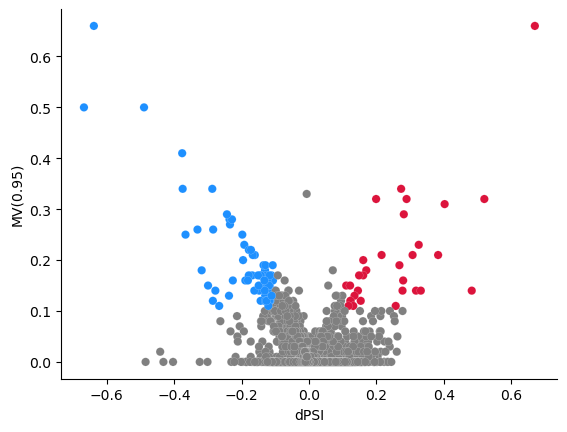

In [11]:
fig, ax = plt.subplots()
colors = ['dodgerblue' if r == 'True' and dpsi < 0 else ('grey' if r == 'False' else 'crimson') for r, dpsi in zip(df['Result'], df['E[dPsi]'])]
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.tick_params(direction = 'out', top=False, right = False, bottom = True)
sns.scatterplot(x=df['E[dPsi]'],y=df['MV[dPsi]_at_0.95'],hue=colors,palette=['grey','crimson','dodgerblue'],linewidth=0.1,legend=False)
plt.xlabel("dPSI")
plt.ylabel("MV(0.95)")
plt.show()
fig.savefig('Vast_tools_mr=30_volcano.png', format='png', dpi=600)

In [12]:
df2=df[(df["Result"] == 'True')] 
df2

,GENE,EVENT,SRR8758292_1,SRR8758295_1,E[dPsi],MV[dPsi]_at_0.95,Result,Type
640,CCDC80,HsaEX1007499,0.839559,0.522445,0.317115,0.14,True,Exon Skip
679,MKNK2,HsaEX0039398,0.631932,0.306703,0.325229,0.23,True,Exon Skip
1167,ADGRG6,HsaEX0028280,0.583335,0.200682,0.382653,0.21,True,Exon Skip
1669,HERC2,HsaEX1016718,0.486656,0.205643,0.281014,0.29,True,Exon Skip
2411,CHEK1,HsaEX0015138,0.853999,0.985449,-0.131450,0.12,True,Exon Skip
...,...,...,...,...,...,...,...,...
105435,TIA1,HsaINT0167039,0.140944,0.273284,-0.132341,0.16,True,Intron retention
111641,TRIM41,HsaINT0172365,0.591247,0.772350,-0.181103,0.16,True,Intron retention
113474,BAG6,HsaINT1005014,0.061024,0.171790,-0.110766,0.13,True,Intron retention
114810,COA1,HsaINT1008030,0.700904,0.967158,-0.266254,0.11,True,Intron retention


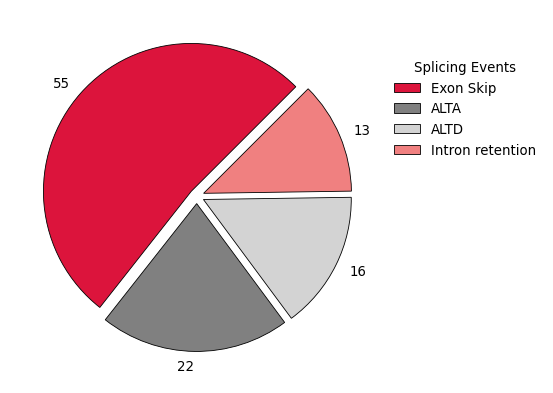

In [14]:
#Gobal pieplot of the AS events
# para fazer este gráfico o resultado não pode estar em formato de dataframe tem que estar em array
events_type =df2['Type'].value_counts()
events_type

# plotting
fig, ax = plt.subplots(figsize = (6,4), dpi = 120)


explode_val = (np.ones((1,events_type.shape[0]))*0.05)[0].tolist() # define explode size (é o afastamento das secções)
colors = ['crimson','grey', 'lightgrey', 'lightcoral']

ax.pie(events_type, colors = colors, startangle = 45, radius = 1, explode = explode_val,
                        labels = events_type.values, textprops={'fontsize': 8},
                        wedgeprops = {'linewidth': 0.5, 'edgecolor': 'black'})

labels = events_type.index
plt.legend(labels, title = 'Splicing Events', title_fontsize = 8, loc =0, bbox_to_anchor=(1, .9), frameon = False, fontsize = 8);
fig.savefig('Vast_tools_mr=30_global_bbox_to_anchor_and_title=8.png', format='png', dpi=600)

In [15]:
df3=df[(df["Result"] == 'True')] 
df3=df3[(df3["E[dPsi]"] > 0)]
df3=df3.reset_index()
df3

,index,GENE,EVENT,SRR8758292_1,SRR8758295_1,E[dPsi],MV[dPsi]_at_0.95,Result,Type
0,640,CCDC80,HsaEX1007499,0.839559,0.522445,0.317115,0.14,True,Exon Skip
1,679,MKNK2,HsaEX0039398,0.631932,0.306703,0.325229,0.23,True,Exon Skip
2,1167,ADGRG6,HsaEX0028280,0.583335,0.200682,0.382653,0.21,True,Exon Skip
3,1669,HERC2,HsaEX1016718,0.486656,0.205643,0.281014,0.29,True,Exon Skip
4,2674,LRP5,HsaEX0036453,0.257482,0.096768,0.160714,0.20,True,Exon Skip
5,3407,SPTAN1,HsaEX0061552,0.692539,0.385541,0.306998,0.21,True,Exon Skip
6,6281,PXN,HsaEX0051412,0.289837,0.166795,0.123042,0.12,True,Exon Skip
7,6453,NLRP1,HsaEX0001260,0.884973,0.595839,0.289134,0.32,True,Exon Skip
8,9250,DGUOK,HsaEX0019478,0.649084,0.392093,0.256992,0.11,True,Exon Skip
9,10862,RHOJ,HsaEX0053526,0.692155,0.413169,0.278986,0.16,True,Exon Skip


In [16]:
Genes_red=df3[['GENE']]
Genes_red = Genes_red.drop_duplicates(subset='GENE')
Genes_red

,GENE
0,CCDC80
1,MKNK2
2,ADGRG6
3,HERC2
4,LRP5
5,SPTAN1
6,PXN
7,NLRP1
8,DGUOK
9,RHOJ


In [17]:
top_10_rows = df3.nlargest(10, 'E[dPsi]')
top_10_rows

,index,GENE,EVENT,SRR8758292_1,SRR8758295_1,E[dPsi],MV[dPsi]_at_0.95,Result,Type
22,64001,FAM120A,HsaALTD1002234-3/5,0.691248,0.021853,0.669396,0.66,True,ALTD
28,95542,LIMA1,HsaINT1018241,0.898503,0.378895,0.519609,0.32,True,Intron retention
25,79073,ITSN2,HsaALTD1042796-2/2,0.972391,0.490059,0.482332,0.14,True,ALTD
26,88433,ECE1,HsaINT1012092,0.834142,0.432139,0.402003,0.31,True,Intron retention
2,1167,ADGRG6,HsaEX0028280,0.583335,0.200682,0.382653,0.21,True,Exon Skip
11,18033,ENTPD6,HsaEX0022558,0.860098,0.528695,0.331402,0.14,True,Exon Skip
1,679,MKNK2,HsaEX0039398,0.631932,0.306703,0.325229,0.23,True,Exon Skip
0,640,CCDC80,HsaEX1007499,0.839559,0.522445,0.317115,0.14,True,Exon Skip
5,3407,SPTAN1,HsaEX0061552,0.692539,0.385541,0.306998,0.21,True,Exon Skip
7,6453,NLRP1,HsaEX0001260,0.884973,0.595839,0.289134,0.32,True,Exon Skip


In [18]:
Over_genes_output=pd.read_csv('./Thesis/GSEA_over_analysis.txt',delimiter="\t")
Over_genes_output.rename(columns = {'Gene name':'GENE'}, inplace = True)
OVER_VT= pd.merge(Over_genes_output,df3, on=['GENE'],how='inner')
OVER_VT

,GENE,index,EVENT,SRR8758292_1,SRR8758295_1,E[dPsi],MV[dPsi]_at_0.95,Result,Type
0,LIMA1,95542,HsaINT1018241,0.898503,0.378895,0.519609,0.32,True,Intron retention
1,NLRP1,6453,HsaEX0001260,0.884973,0.595839,0.289134,0.32,True,Exon Skip
2,VEGFB,59163,HsaALTA0009398-1/2,0.473706,0.304015,0.169691,0.18,True,ALTA


In [19]:
df2.to_csv('./Thesis/Diff_spliced_VT_mr=30_genes.csv', sep=',',index=False)

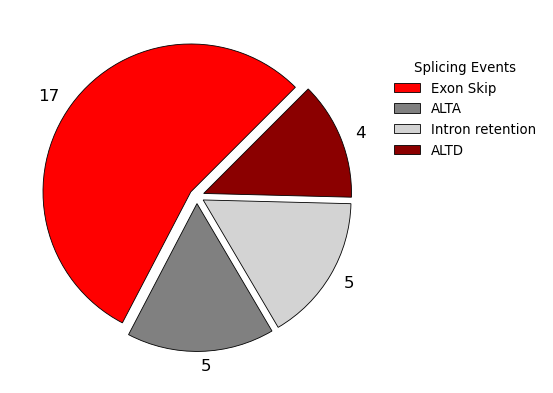

In [20]:
#Pie plot of the events more frequent in FOXO1 overexpressing cells
# para fazer este gráfico o resultado não pode estar em formato de dataframe tem que estar em array
events_type =df3['Type'].value_counts()
events_type

# plotting
fig, ax = plt.subplots(figsize = (6,4), dpi = 120)


explode_val = (np.ones((1,events_type.shape[0]))*0.05)[0].tolist() # define explode size (é o afastamento das secções)
colors = ['red','grey', 'lightgrey', 'darkred']

ax.pie(events_type, colors = colors, startangle = 45, radius = 1, explode = explode_val,
                        labels = events_type.values, textprops={'fontsize': 10},
                        wedgeprops = {'linewidth': 0.5, 'edgecolor': 'black'})

labels = events_type.index
plt.legend(labels, title = 'Splicing Events', title_fontsize = 8, loc = 2, 
           bbox_to_anchor=(1, .9), frameon = False, fontsize = 8);
fig.savefig('Vast_tools_mr=30_Overexpression_bbox_to_anchor_and_title=8.png', format='png', dpi=600)

In [21]:
df4=df[(df["Result"] == 'True')] 
df4=df4[(df4["E[dPsi]"] < 0)]
df4=df4.reset_index()
df4

,index,GENE,EVENT,SRR8758292_1,SRR8758295_1,E[dPsi],MV[dPsi]_at_0.95,Result,Type
0,2411,CHEK1,HsaEX0015138,0.853999,0.985449,-0.131450,0.12,True,Exon Skip
1,2440,CSNK1G3,HsaEX0017555,0.064967,0.209882,-0.144915,0.17,True,Exon Skip
2,3091,DENND4A,HsaEX0019175,0.163249,0.264553,-0.101304,0.14,True,Exon Skip
3,6908,KIAA0586,HsaEX0033759,0.668687,0.857426,-0.188740,0.16,True,Exon Skip
4,9217,PLSCR4,HsaEX0048509,0.232255,0.424161,-0.191907,0.23,True,Exon Skip
...,...,...,...,...,...,...,...,...,...
70,101485,LRRC37B,HsaINT1022071,0.139030,0.423169,-0.284139,0.26,True,Intron retention
71,105435,TIA1,HsaINT0167039,0.140944,0.273284,-0.132341,0.16,True,Intron retention
72,111641,TRIM41,HsaINT0172365,0.591247,0.772350,-0.181103,0.16,True,Intron retention
73,113474,BAG6,HsaINT1005014,0.061024,0.171790,-0.110766,0.13,True,Intron retention


In [22]:
Genes_blue=df4[['GENE']]
Genes_blue = Genes_blue[Genes_blue.duplicated(keep=False)]
Genes_blue

,GENE
12,ABI3BP
13,ABI3BP
17,TCF4
23,FRG1
24,FRG1
28,HERC2
37,WDR1
44,HERC2
52,TCF4
54,WDR1


In [23]:
top_10_rows = df4.nlargest(10, 'E[dPsi]')
top_10_rows

,index,GENE,EVENT,SRR8758292_1,SRR8758295_1,E[dPsi],MV[dPsi]_at_0.95,Result,Type
2,3091,DENND4A,HsaEX0019175,0.163249,0.264553,-0.101304,0.14,True,Exon Skip
33,35666,DLGAP1-AS1,HsaEX0004838,0.739539,0.846398,-0.106860,0.16,True,Exon Skip
16,17352,TRAPPC6B,HsaEX0066944,0.719343,0.826356,-0.107013,0.14,True,Exon Skip
55,66058,DDX17,HsaALTD0001846-1/4,0.627480,0.735085,-0.107606,0.19,True,ALTD
30,31964,MBNL1,HsaEX0038106,0.380609,0.489285,-0.108676,0.14,True,Exon Skip
73,113474,BAG6,HsaINT1005014,0.061024,0.171790,-0.110766,0.13,True,Intron retention
32,34508,TMUB2,HsaEX0066125,0.494438,0.605629,-0.111192,0.17,True,Exon Skip
13,14548,ABI3BP,HsaEX0000695,0.873058,0.984804,-0.111746,0.14,True,Exon Skip
21,21945,UIMC1,HsaEX0069239,0.809164,0.921523,-0.112359,0.14,True,Exon Skip
37,40883,WDR1,HsaALTA0009472-1/2,0.394869,0.509937,-0.115068,0.12,True,ALTA


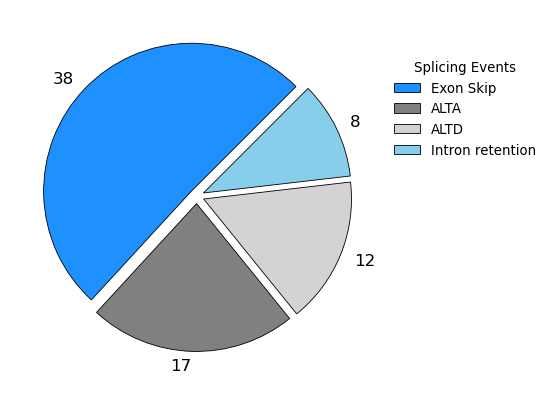

In [24]:
#Pie plot of the events more frequent in control cells
# para fazer este gráfico o resultado não pode estar em formato de dataframe tem que estar em array
events_type =df4['Type'].value_counts()
events_type

# plotting
fig, ax = plt.subplots(figsize = (6,4), dpi = 120)


explode_val = (np.ones((1,events_type.shape[0]))*0.05)[0].tolist() # define explode size (é o afastamento das secções)
colors = ['dodgerblue','grey', 'lightgrey', 'skyblue']

ax.pie(events_type, colors = colors, startangle = 45, radius = 1, explode = explode_val,
                        labels = events_type.values, textprops={'fontsize': 10},
                        wedgeprops = {'linewidth': 0.5, 'edgecolor': 'black'})

labels = events_type.index
plt.legend(labels, title = 'Splicing Events', title_fontsize = 8, loc = 2, 
           bbox_to_anchor=(1, .9), frameon = False, fontsize = 8);
fig.savefig('Vast_tools_mr=30_control_bbox_to_anchor_and_title=8.png', format='png', dpi=600)